### Unsupervised Learning Project 2

#### Domain: BFSI
 
#### Data Description:
Data contains details of some decision rules which can help in predicting qualitative bankruptcy

#### Attribute Information:

(P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

1. Industrial Risk: {P,A,N}

2. Management Risk: {P,A,N} 

3. Financial Flexibility: {P,A,N} 

4. Credibility: {P,A,N}

5. Competitiveness: {P,A,N}

6. Operating Risk: {P,A,N}

7. Class: {B,NB}


### Learning Outcomes:

● ExploratoryDataAnalysis 

● Clustering

● SupervisedLearning(SVC)

### Objective:

Predict the Bankruptcy from Qualitative parameters from experts.

#### Steps and tasks:​ ( 30 points)

1. Read the dataset and understand the features and target variable. (3 points)
2. Encode independent features. You can use manual encoding (5 points)
3. Separate the dependent variable (class) from the data. (1 point)
4. Check distribution of target column and independent features and
comment your findings. ( 3 points)
5. Apply KMeans or hierarchical clustering algorithm on the above data.
(5 points)
6. Select optimal number of clusters and form clusters of the data. (3
points)
7. Create a new column in the data and populate it with the cluster
labels. (2 points)
8. Split the data into train and test set. (1 points)
9. Apply SVC model on train dataset and predict target for test dataset. (5
points)
10. Check accuracy and confusion matrix. (2 point)

### Import all the necessary modules

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns

### 1. Read the dataset and understand the features and target variable. (3 points)

In [2]:
# Add the Features and Target Variables in a list and pass this as 'names' while reading the CSV file
header_list = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

In [3]:
#read the file and pass column names from tne list
bankrupcy_df = pd.read_csv("Qualitative_Bankruptcy.data.txt", names= header_list)

In [4]:
bankrupcy_df.shape

(250, 7)

In [5]:
bankrupcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
#check for Null values

bankrupcy_df.isna().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

#### So, we have 250 records and 6 features and one Target column (Class). 

There are no missing values. 

All are categorical data. 

All features are ordinal with three possible values (Positive, Average and Negative). 

The target variable can take two possible values 'B' to indicate  'Bankrupcy' and 'NB' to inidcate 'Non-Bankrupcy'.


     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

In [7]:
#Lets look at some sample data
bankrupcy_df.sample(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
95,P,P,P,A,P,N,NB
215,N,A,P,A,N,P,B
186,N,N,N,A,N,N,B
151,N,N,N,A,N,P,B
235,A,N,N,N,N,A,B
49,A,P,P,A,P,P,NB
82,A,P,P,P,P,P,NB
126,N,N,P,A,P,N,NB
81,A,P,A,P,A,P,NB
163,P,N,N,N,N,P,B


In [8]:
# Count of records per Target Variable 'Class'
bankrupcy_df["Class"].value_counts()

NB    143
B     107
Name: Class, dtype: int64

#### So there are 107 instnaces of Bankrupcy and 143 Non Bankrupcy

In [9]:
# Below is another way of summarizing the details

bankrupcy_df_stats = pd.DataFrame(columns = ['column', 'values', 'value_count_including_na', 'value_count_without_na', 'missing_val'])

tmp = pd.DataFrame()

for c in bankrupcy_df.columns:
    tmp['column'] = [c]
    tmp['values'] = [bankrupcy_df[c].unique()]
    tmp['value_count_including_na'] = len(list(bankrupcy_df[c].unique()))
    tmp['value_count_without_na'] = int(bankrupcy_df[c].nunique())
    tmp['missing_val'] = bankrupcy_df[c].isnull().sum()
    bankrupcy_df_stats = bankrupcy_df_stats.append(tmp)
    
bankrupcy_df_stats

,column,values,value_count_including_na,value_count_without_na,missing_val
0,Industrial Risk,"[P, N, A]",3,3,0
0,Management Risk,"[P, N, A]",3,3,0
0,Financial Flexibility,"[A, P, N]",3,3,0
0,Credibility,"[A, P, N]",3,3,0
0,Competitiveness,"[A, P, N]",3,3,0
0,Operating Risk,"[P, N, A]",3,3,0
0,Class,"[NB, B]",2,2,0


#### All features have three categorical values P, A and N. Target class takes two values B and NB. There are no Null or missing values. 

### 2. Encode independent features. You can use manual encoding (5 points)


In [10]:
# create dictionary of ordinal to integer encoding.
# Since the features value are ordinal, we will take -1 for Negative, 0 for Average and 1 to indicate Postive
mapping = {'N':-1,'A':0,'P':1,'NB':0,'B':1}

In [11]:
#create a copy of the dataframe to hold the encoded dataframe
encoded_bankrupcy_df = bankrupcy_df.copy()
# encode using map
encoded_bankrupcy_df['Industrial Risk'] = bankrupcy_df['Industrial Risk'].map(mapping)
encoded_bankrupcy_df['Management Risk'] = bankrupcy_df['Management Risk'].map(mapping)
encoded_bankrupcy_df['Financial Flexibility'] = bankrupcy_df['Financial Flexibility'].map(mapping)
encoded_bankrupcy_df['Credibility'] = bankrupcy_df['Credibility'].map(mapping)
encoded_bankrupcy_df['Competitiveness'] = bankrupcy_df['Competitiveness'].map(mapping)
encoded_bankrupcy_df['Operating Risk'] = bankrupcy_df['Operating Risk'].map(mapping)
encoded_bankrupcy_df['Class'] = bankrupcy_df['Class'].map(mapping)

In [12]:
encoded_bankrupcy_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,0
1,-1,-1,0,0,0,-1,0
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0
4,-1,-1,1,1,1,-1,0


### 3. Separate the dependent variable (class) from the data. (1 point)

In [13]:
# Separate the independent and target variables
X = encoded_bankrupcy_df.drop("Class" , axis=1)
y = encoded_bankrupcy_df["Class"]

In [14]:
X.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1,1,0,0,0,1
1,-1,-1,0,0,0,-1
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,-1,-1,1,1,1,-1


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### 4. Check distribution of target column and independent features and comment your findings. ( 3 points)

In [16]:
# Distribution of Target Column 'Class' NB':0,'B':1
encoded_bankrupcy_df.groupby(['Class']).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,,,,,,
0,143,143,143,143,143,143
1,107,107,107,107,107,107


It seems the dataset is more or less balanced, 143 instances of Non Bankrupcy and 107 instances of Bankrupcy.

In [17]:
# Original dataframe 
bankrupcy_df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


Since the original dataframe has non-numerical data the describe() function gives very limited information
Now lets look at the encoded dataframe

In [18]:
# describe encoded dtaframe
encoded_bankrupcy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,-0.036,0.823051,-1.0,-1.0,0.0,1.0,1.0
Management Risk,250.0,-0.228,0.821410,-1.0,-1.0,0.0,0.0,1.0
Financial Flexibility,250.0,-0.248,0.803166,-1.0,-1.0,0.0,0.0,1.0
Credibility,250.0,-0.060,0.831363,-1.0,-1.0,0.0,1.0,1.0
Competitiveness,250.0,-0.048,0.881364,-1.0,-1.0,0.0,1.0,1.0
Operating Risk,250.0,-0.140,0.869150,-1.0,-1.0,0.0,1.0,1.0
Class,250.0,0.428,0.495781,0.0,0.0,0.0,1.0,1.0


Since it has ctegorical data, the describe() function would not be much useful in summarizing the data. Let's try to build something for visual analysis of these ordinal features and infer from the same.

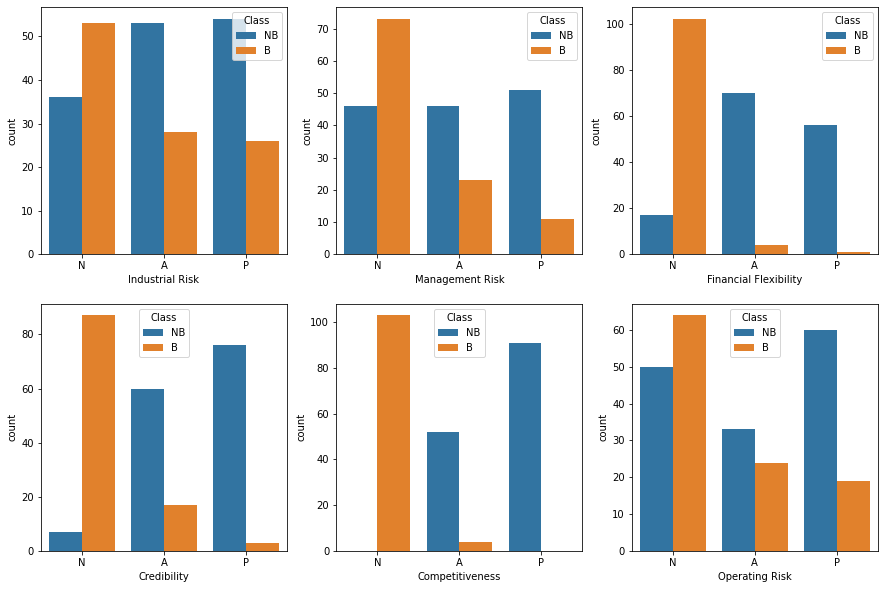

<Figure size 1080x720 with 0 Axes>

In [19]:
# For all features, lets look at the data distribution an try to infer

ix = 1
fig = plt.figure(figsize = (15,10))

# repeat for all features

for c in list(bankrupcy_df.columns):
    if ix <= 6:
        if c != 'Class':
            ax1 = fig.add_subplot(2,3,ix)
            sns.catplot(x=c, hue="Class", data=bankrupcy_df, kind="count",ax=ax1, order= ['N','A','P'] )
            plt.close(2) # catplot creates an extra figure we don't need
         
    ix = ix +1
    if ix == 7: 
        fig = plt.figure(figsize = (15,10))
        ix =1

####   Inferences

1. 'Competitiveness' seems to be a key indicator to indicate Bankrupcy or not. Most records with Average 'Competitiveness' did not file Bankrupcy. None with Positive 'Competitiveness' went Bankrupt, while all with negative 'Competitiveness' went Bankrupt.

2. 'Financial Flexibility' also seems to be one of the indicators. Majority with Negative 'Financial Flexibility' seems to be Bankrupt while very few with Averge or Postive 'Financial Flexibility' went Bankrupt.

3. 'Credibility' also seems to be highly negatively correlated to Bankrupcy. As credibility increases, very less chance of Bankrupcy.


### 5. Apply KMeans or hierarchical clustering algorithm on the above data. (5 points)

In [20]:
#Using Kmeans and finding optimal no. of clusters

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(X)
    prediction=kmeans_model.predict(X)
    meanDistortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])



### 6.Select optimal number of clusters and form clusters of the data. (3 points)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

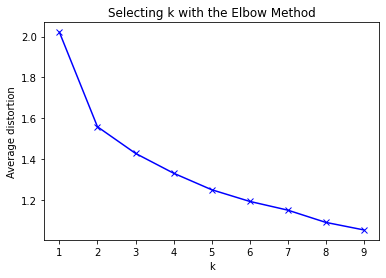

In [21]:

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### From the ablove elbow diagram we can see optimum number of cluster 2 

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [24]:
#Lets check the silhouette_scores also for this model
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
silhouette_scores


[0.3446100520145501,
 0.29613292157554566,
 0.2532676726303585,
 0.250315592481105,
 0.2600485248684256,
 0.24791916397356514,
 0.2824806507605025,
 0.2893554703064855]

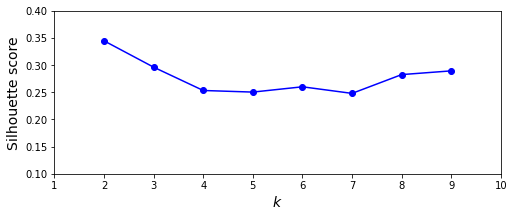

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0.1, 0.4])

plt.show()

#### From above silhouette_score also it is evident that Cluster =2 is the best choice

### 7. Create a new column in the data and populate it with the cluster labels. (2 points)

In [26]:
#Lets create a copy of the dataset
X2 = X.copy()

# Create model using Kmeans Clustering with 2 clusters
final_model=KMeans(2)
final_model.fit(X2)
prediction=final_model.predict(X2)

#Append the prediction 
X2["GROUP"] = prediction
print(" 2 Groups Assigned : \n")
X2

 2 Groups Assigned : 



,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,GROUP
0,1,1,0,0,0,1,0
1,-1,-1,0,0,0,-1,1
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0
4,-1,-1,1,1,1,-1,0
...,...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1,1
246,1,-1,-1,-1,-1,-1,1
247,0,-1,-1,-1,-1,-1,1
248,-1,-1,-1,-1,-1,-1,1


In [27]:
X2['GROUP'].value_counts()

0    142
1    108
Name: GROUP, dtype: int64

Thus it seems that our clustering alogorithm has put 142 instances in on cluster and rest 108 in another.

### 8. Split the data into train and test set. (1 points)

In [28]:
# Split data in Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
# check number of records in Traina nd Test Set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 6)
(75, 6)
(175,)
(75,)


#### So 175 records are in Train set and 75 in Test Set

In [30]:
X_train

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
82,0,1,1,1,1,1
29,-1,1,1,1,1,-1
126,-1,-1,1,0,1,-1
79,0,1,-1,1,0,1
86,-1,1,-1,1,1,0
...,...,...,...,...,...,...
106,0,1,-1,1,0,1
14,-1,-1,0,1,0,-1
92,0,-1,-1,1,1,0
179,-1,-1,-1,1,-1,1


In [31]:
y_train

82     0
29     0
126    0
79     0
86     0
      ..
106    0
14     0
92     0
179    1
102    0
Name: Class, Length: 175, dtype: int64

### 9. Apply SVC model on train dataset and predict target for test dataset. (5 points)

In [32]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [33]:
# Apply SVC on the dataset
from sklearn import svm

clf = svm.SVC(kernel='linear')


In [34]:
# Print the model details
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [35]:
# fit model
clf.fit(X_train, y_train)

# predict on X_test
y_pred = clf.predict(X_test)

### 10. Check accuracy and confusion matrix. (2 point)

In [36]:
print("Train Score " , clf.score(X_train, y_train))
print("Test Score " , clf.score(X_test, y_test))

Train Score  0.9942857142857143
Test Score  1.0


In [37]:
from sklearn import metrics

print(metrics.confusion_matrix(y_pred,y_test))
print(metrics.classification_report(y_pred, y_test))

[[40  0]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        35

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [38]:
# We can also use Crosstab to check Predicted class vs. Actual Class in Test Set
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,40,0
1,0,35


####  So it is evident that there are no misclassification in this test set. The model is able to successfully categorize data into correct Class.

### End Of Project